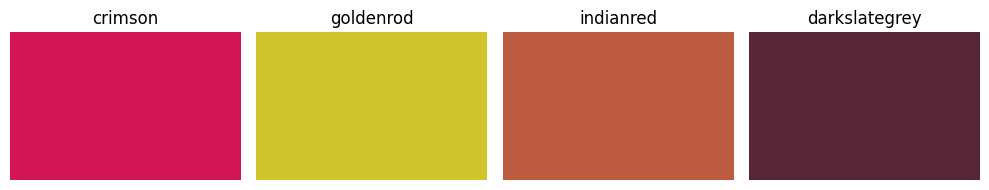

Color 1: #d21555 (crimson)
Color 2: #d1c52d (goldenrod)
Color 3: #bc5b3f (indianred)
Color 4: #562637 (darkslategrey)


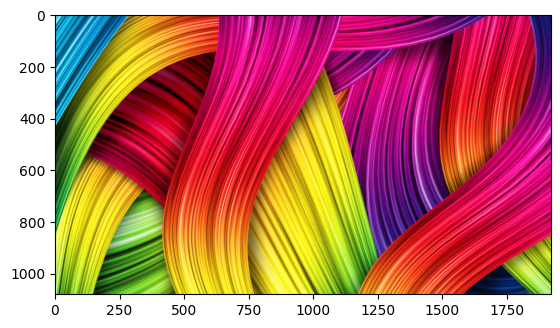

In [6]:
import numpy as np
import cv2
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import webcolors

def closest_color(requested_color):
    min_colors = {}
    for name, hex_value in webcolors.CSS3_NAMES_TO_HEX.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(hex_value)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def generate_color_palette(image_path, num_colors):
    
    image = cv2.imread(image_path)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    reshaped_image = image_rgb.reshape(-1, 3)
    
    
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    edges = cv2.Canny(blurred_image, 50, 150)
    
    reshaped_edges = edges.reshape(-1, 1)
    
    
    features = np.concatenate((reshaped_image, reshaped_edges), axis=1)
    
    
    kmeans = MiniBatchKMeans(n_clusters=num_colors)
    kmeans.fit(features)
    colors = kmeans.cluster_centers_
    colors = colors[:, :3].astype(int)
    
    
    hex_values = []
    color_names = []
    
    
    fig, ax = plt.subplots(1, num_colors, figsize=(10, 2))
    
    for i, color in enumerate(colors):
    
        rgb_values = color / 255.
    
        hex_value = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
        hex_values.append(hex_value)
        
        color_name = closest_color(color)
        color_names.append(color_name)
        
        ax[i].add_patch(plt.Rectangle((0, 0), 1, 1, facecolor=rgb_values))
        ax[i].set_xlim((0, 1))
        ax[i].set_ylim((0, 1))
        ax[i].axis('off')
        ax[i].set_title(color_name)
    
    plt.tight_layout()
    plt.show()
    
    return hex_values, color_names


image_path = 'image.jpeg'
num_colors = 4
color_palette, color_names = generate_color_palette(image_path, num_colors)



image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)



for i, (color, name) in enumerate(zip(color_palette, color_names)):
    print(f"Color {i+1}: {color} ({name})")
